<a href="https://colab.research.google.com/github/alves-bruno-ds/wordcloud-10_passos/blob/main/Wordcloud_em_10_passos_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/C_DADOS.BR%20POSTS.png">


# Wordcloud em 10 passos
## Análise Qualitativa - Imóveis em Nova Iorque (Airbnb)

Passo a passo com 10 etapas para a geração de uma wordcloud a partir de um arquivo do tipo (.csv).

Questão: Quais as principais características dos imóveis disponíveis para locação via Airbnb na cidade de Nova Iorque, de acordo com a descrição disponibilizada por seus anfitriões?

<figure>
<center>
<img src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Wordcloud_NYC2.png" />
<figcaption></figcaption></center>
</figure>

## Passo 01 - Fonte de Dados

Primeiramente, baixei do site [Inside Airbnb](http://insideairbnb.com/get-the-data/) o arquivo, do tipo (*.csv*) com os dados de hospedagem para a cidade de Nova Iorque.

Note que, ao localizar a cidade escolhida, temos diversos arquivos disponíveis para download. A opção adequada é o *listing.csv.gz*, que tem a seguinte descrição: *Detailed Listing Data (Lista Detalhada)*.

<figure>
<center>
<img src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/inside_airbnb.png" />
<figcaption></figcaption></center>
</figure>

## Passo 02 - Instalar a biblioteca `wordcloud`

Utilizando do comando `! pip install`, instalei a biblioteca:

In [3]:
!pip install wordcloud -q

## Passo 03 - Importação das bibliotecas auxiliares (nativas) 

Nesta fase, fiz a importação de algumas bibliotecas, já instaladas por padrão em nosso Google Colab, como `Pandas, Matplotlib, Numpy, Pil` e também a `wordcloud`que acabei de instalar. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


## Passo 04 - Integração Google Drive x Google Colab

Como salvei meu arquivo *.csv* em meu *Google Drive*, é necessário fazer a integração do disco virtual com o Google Colab, para que o mesmo identifique o caminho da fonte para a extração dos dados. 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Passo 05 - Importação dos dados

Após fazer o link entre o Google Colab e Google Drive, consigo importar o arquivo em um *Dataframe*

In [6]:
DATASET = "/content/drive/MyDrive/Colab Notebooks/Exercícios/listings_NYC.csv"
df=pd.read_csv(DATASET)

<ipython-input-6-6a184a7537ba>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(DATASET)


## Passo 06 - Características do Dataframe

Após a importação, já conseguimos obter algumas informações importantes sobre o conjunto de dados em estudo, como:

* `type(df)`: Tipo - Arquivo do tipo *Dataframe* do Pandas
* `df.shape`: Formato - Possui 75 colunas (series) e 42.931 linhas (variáveis)
* `df.head()`: Exibição das 05 primeiras variáveis para análise prévia e entendimento dos dados

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(42931, 75)

In [9]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11


## Passo 07 - Seleção dos dados para estudo

Dentre as 75 colunas presentes em nosso *Dataset*, apenas 01 delas será utilizada neste estudo, que é a coluna `description`. É nela que contém a descrição de cada propriedade, com as principais características e vantagens, informadas pelo anfitrião.
Essas informações, neste caso, são muito úteis pois nos dá uma noção dos benefícios que as locações da cidade de Nova Iorque oferecem a seus hóspedes.

Claro que, por ser uma visualização da amostra, essa impressão obtida é uma média entre todos os imóveis, já que as palavras que aparecem maiores na nuvem, são das características mais frequentes entre todas as acomodações. Para consolidar a idéia, segue breve resumo do conceito da visualização por Nuvem de Palavras ou *Wordcloud*.

### Conceito de *Wordcloud*

A visualização de *wordcloud*, ou nuvem de palavras, é uma técnica que exibe as palavras mais frequentes em um texto de maneira gráfica, em que o tamanho das palavras é proporcional à sua frequência. As principais aplicações incluem análise de sentimentos em mídias sociais, análise de feedback de clientes, **análise de pesquisas qualitativas**, resumos de textos e criação de arte visual.

Uma etapa importante na criação deste gráfico é a exclusão de palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.



## Passo 08 - Removendo os valores ausentes

O próximo passo foi verificar, na coluna `description`a quantidade de valores ausentes e então eliminar essas entradas. 

In [10]:
print("Valores ausentes para description:" , df.description.isnull().sum())

Valores ausentes para description: 753


Foram encontradas 753 entradas com valores ausentes para a coluna `description`. 
Com o comando **`dropna`**, excluí essas entradas.

In [11]:
description=df.dropna(subset=['description'],axis=0)['description']

Após a exclusão dos valores ausentes, já consigo quantificar quantos termos estão disponíveis para serem usados. 

A última etapa de tratamento dos dados é a compactação de todas as avaliações separadas por linha em um único conjunto de palavras (como se todas as palavras formassem uma única frase, ou seja, é necessário concatenar as expressões.



In [12]:
all_description = " ".join(s for s in description)
print ("Quantidade de palavras: {}".format(len(all_description)))

Quantidade de palavras: 29465405


Após concatenar todas as linhas, a quantidade total de palavras que serão distribuídas na visualização de *wordcloud* é de 29.465.405 palavras.

## Passo 09 - Geração da `wordcloud` e exportação da imagem

Depois dos dados tratados e quantificados, é hora de gerar a nossa nuvem de palavras.
Para tanto, é recomendado filtrarmos alguns termos que aparecem com  muita frequência em qualquer frase, porém, não agregam grande sentido na hora de interpretar o resultado, podendo até atrapalhar a visualização. Estou falando dos artigos, pronomes, preposições ("a, o, ele, ela, aquele, este", etc).
O comando para esta operação é o `STOPWORDS`

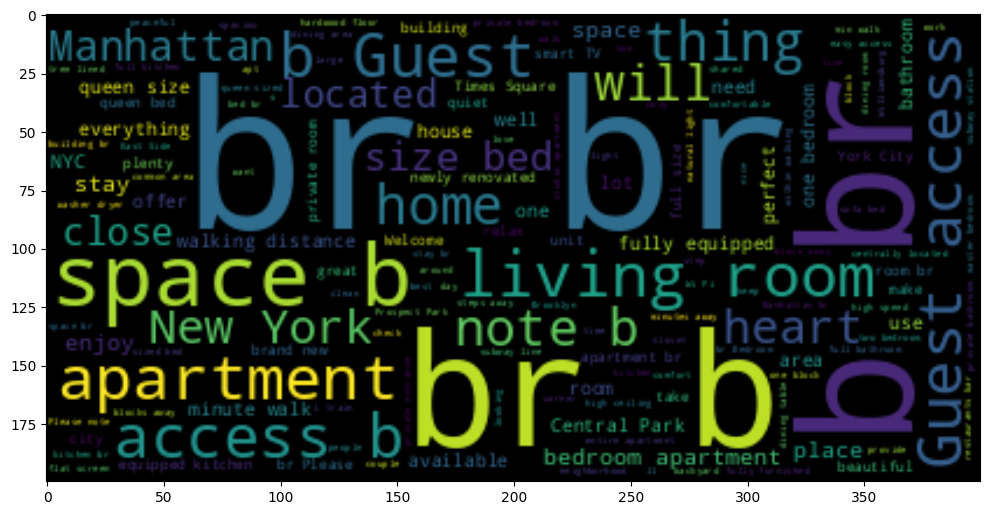

In [13]:
stopwords = set(STOPWORDS)

# gerar a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_description)

# exibir  a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Note que a palavra em maior destaque foi **"br"** e o **"b"**. Obviamente isso não me diz nada, pelo contrário, atrapalha na apresentação dos termos verdadeiramente importantes.

A solução foi criar uma lista de `STOPWORDS` personalizada para que estes termos irrelevantes sejam excluídos.

Como estou estudando um *Dataset* em inglês, decidi elencar alguns pronomes e artigos, juntamente com as expressões "br" e "b" para não restarem dúvidas quanto a exclusão destes.



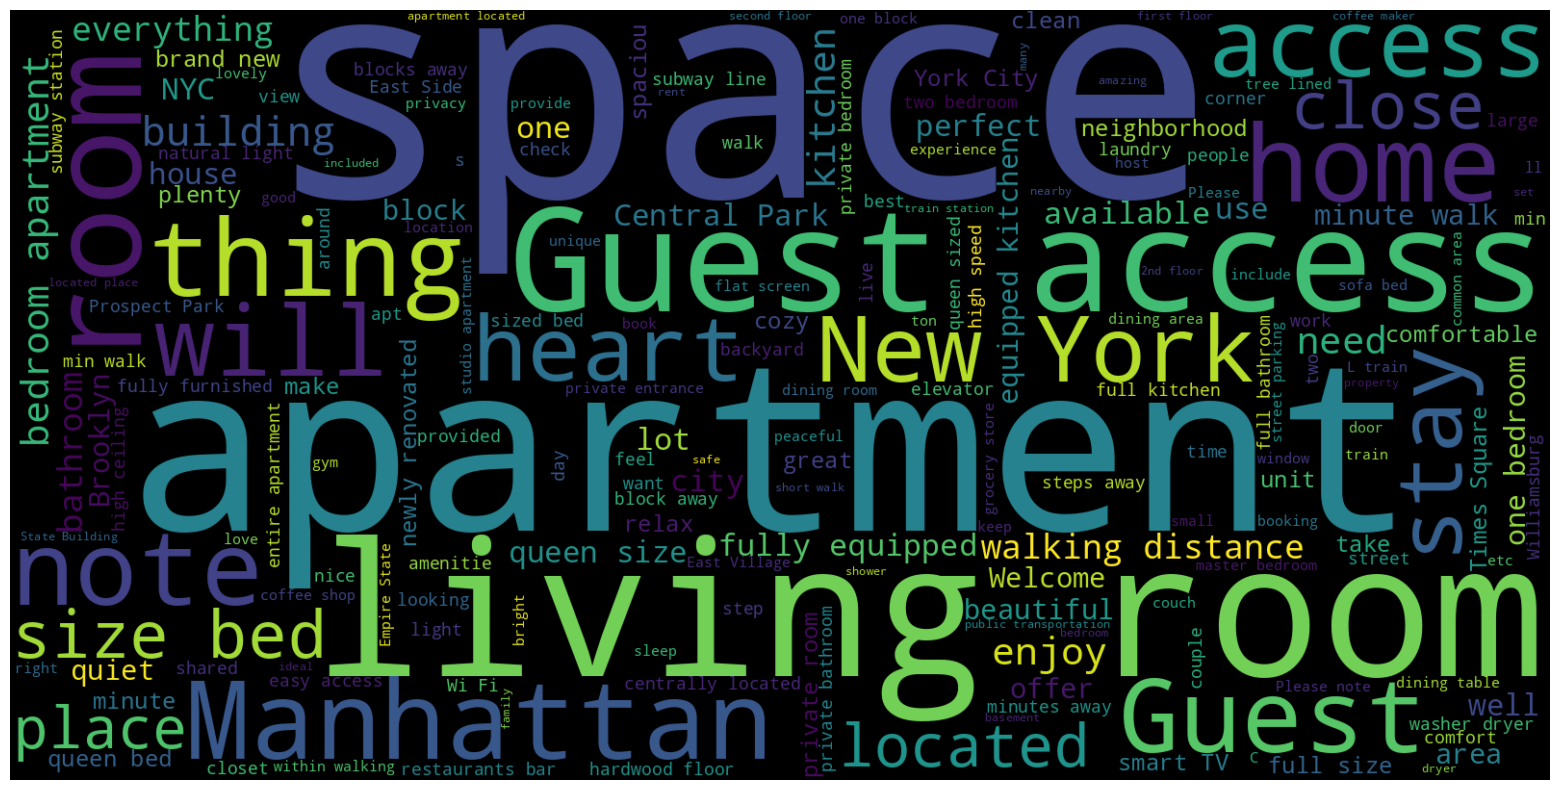

In [15]:
# lista de stopword personalizada
stopwords = set(STOPWORDS)
stopwords.update(["I", "my", "at", "you", "is", "on", "it", "br", "b"])

# gerar a  wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_description)

# exibir a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.tight_layout()

### Exportando a Nuvem de Palavras em formato de imagem

Após gerada, fiz a exportação da imagem pronta para o Google Drive, indicando o caminho do diretório e o nome do arquivo em formato (.png)

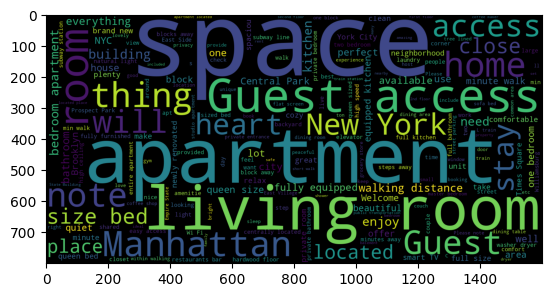

In [17]:
plt.imshow(wordcloud)
wordcloud.to_file("/content/drive/MyDrive/Colab Notebooks/Exercícios/Wordcloud_NYC.png",)

### Inserindo uma máscara (*mask image*)

Para efeito de apresentação, inseri nossa *wordcloud* em uma imagem do tipo [máscara](https://developer.mozilla.org/en-US/docs/Web/CSS/mask-image) (salva no mesmo diretório, no Google Drive):

In [27]:
imagem_mascara = np.array(Image.open("/content/drive/MyDrive/Data Science na Prática/NYC - map.jpg"))

imagem_mascara

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Após importar a imagem para máscara, fiz algumas alterações de layout como:

* Deixar a imagem com fundo transparente - `background_color=None`
* Alteração na cor da fonte das palavras - `colormap=seismic`

[Esquema de cores da biblioteca do Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


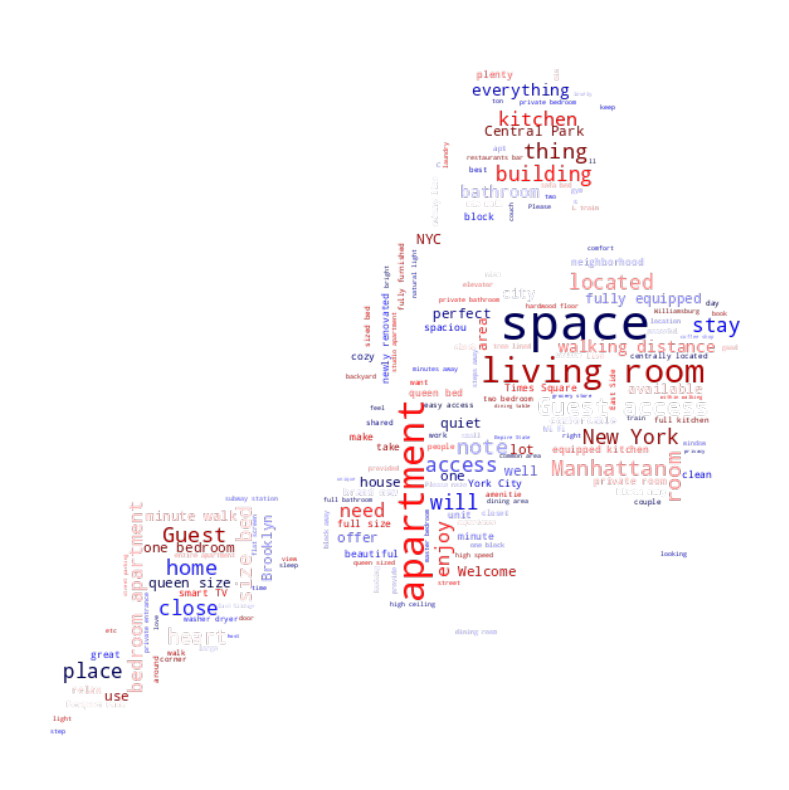

In [57]:
# gerar a  wordcloud
wordcloud2 = WordCloud(stopwords=stopwords,
                      
                      mode = "RGBA",background_color=None,
                      colormap = 'seismic',
                      mask=imagem_mascara,
                      width=1600, height=800).generate(all_description)

# exibir a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.tight_layout()

Exportei também pra o diretório do Google Drive

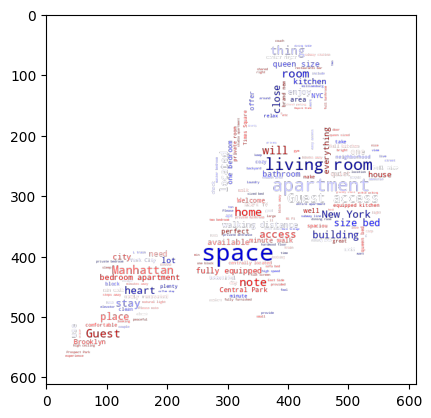

In [59]:
plt.imshow(wordcloud2)
wordcloud.to_file("/content/drive/MyDrive/Colab Notebooks/Exercícios/Wordcloud_NYC2.png",)

## Passo 10 - Conclusões

A visualização me retorna que, as palavras mais frequentes nos anúncios de oferta de imóveis em Nova York são os seguinte:

*   *Space*
*   *Apartment*
*   *Living room*
*   *Guest Acess*
*   *Manhattan*
*   *Size bed / Queem size*

Em um sentido literal, de forma resumida, faço as seguintes considerações:

* Geralmente as acomodações em Nova York são bastante espaçosas;
* A grande maioria disponíveis são apartamentos; 
* O destaque das acomodações é a sala de estar;
* Boa parte dos anúncios são de acomodações completas, ou seja, o hóspede pode utilizar toda a propriedade e área comum do imóvel;
* Temos uma quantidade relevante de imóveis situados na ilha de Manhattan e intermediações;
* Camas grandes são corriqueiras por lá;



